In [3]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from niwidgets import NiftiWidget
from pathlib import Path
import os
from collections import defaultdict
import nibabel as nib
from tqdm import tqdm
from skimage.measure import marching_cubes_lewiner
import meshplot as mp
import matplotlib.pyplot as plt



## Visualize Ground Truth mask and Predicted mask side by side

In [12]:
PREDICTIONS_BASE_PATH=Path(r'G:\Projects and Work\Mouse Heart Segmentation\Trained Weights - Human Heart\Unet_efficientnet-b4\Outputs')
subject = 'ct_train_1018_image'  # You can change the subject name
ground_truth_mask=np.array(nib.load(os.path.join(PREDICTIONS_BASE_PATH,subject,'ground_truth_mask.nii.gz')).get_fdata())
predicted_mask=np.array(nib.load(os.path.join(PREDICTIONS_BASE_PATH,subject,'prediction_mask.nii.gz')).get_fdata())

In [13]:
v1,f1,_,_ = marching_cubes_lewiner(predicted_mask)
v2,f2,_,_ = marching_cubes_lewiner(ground_truth_mask)

C:\Users\SHAHER~1\AppData\Local\Temp/ipykernel_11232/3775177587.py:1: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  v1,f1,_,_ = marching_cubes_lewiner(predicted_mask)
C:\Users\SHAHER~1\AppData\Local\Temp/ipykernel_11232/3775177587.py:2: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  v2,f2,_,_ = marching_cubes_lewiner(ground_truth_mask)


### Predicted Mask

In [21]:
# mp.plot(v1,f1,c=v1[:, 1])
p = mp.plot(v1, f1,  return_plot=True)
p.add_points(v1 + 200, c=v1[:,2] );


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(250.5, 27…

### Ground Truth mask

In [22]:
p = mp.plot(v2, f2,  return_plot=True)
p.add_points(v2 + 200, c=v2[:,2] );

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(250.5, 27…

### Analyzing Models

['Unet_efficientnet-b4', 'Unet_resnet101', 'Unet_se_resnext50_32x4d']

In [57]:
best_metrics={}
best_loss={}
all_models = os.listdir("../Trained Weights - Human Heart")
for k in all_models:
    df=pd.read_csv(os.path.join("../Trained Weights - Human Heart",k,"validation_logs.csv"))
    best_metrics[k]=max(df['iou_score'])
    best_loss[k]=min(df['dice_loss'])

In [58]:
print(best_metrics)

{'Unet_efficientnet-b4': 0.8820714964271043, 'Unet_resnet101': 0.883959390579499, 'Unet_se_resnext50_32x4d': 0.8848143161874713}


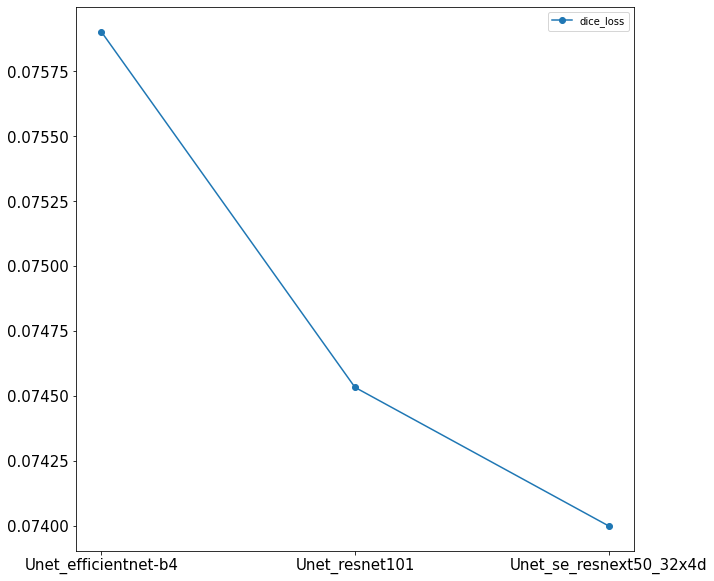

In [78]:
plt.figure(figsize=(10,10))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 


plt.plot(best_metrics.keys(),best_loss.values(),"-o")
# plt.plot(best_metrics.keys(),best_loss.values(),"o")


# plt.plot("a", list(best_metrics.values())[0], "v")
# plt.plot("b", list(best_metrics.values())[0], "d")
# plt.plot("c", list(best_metrics.values())[0], "x")
plt.legend(["dice_loss"])
